# Authors:
- Chris Shi
- Erika Grandy
- Sumedha

# Dataset Description

This dataset contains information about used car prices.

https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data

 This dataset includes the below columns.

## Target Column
*   Price (numeric)

## Features

### Numeric
*   ID - ID used to uniquely identify row
*   Levy (numeric) - Describes import/export tax of the vehicle.
*   Prod. year (numeric) - Year the vehicle was manufactured.
*   Cylinders (numeric) - Number of Cylinders in the Engine
*   Airbags (numeric) - Number of Airbags within the vehicle.

### String
*   Manufacturer - Manufacturer company of the vehicle (Chevrolet, Honda, Lexus, etc)
*   Model - Model of the vehicle (Escape, Sonata, Corolla, etc)
*   Category - Type of vehicle (Sedan, Coupe, Pickup, SUV, etc)
*   Leather interior (Yes/No) - If the vehicle includes a leather interior
*   Fuel Type - Type of fuel for the vehicle (Gas, Hybrid, Diesel, etc)
*   Engine Volume - Engine volume in Litres. Also includes if Turbo or not.
*   Mileage - Mileage of the vehicle, with 'km' units.
*   Gear box type - Type of transmission (Manual, Automatic, etc)
*   Drive wheels - Drive wheels of the vehicle (Front-wheel drive, rear-wheel drive, 4x4, etc)
*   Door - Vehicle's number of doors, in ranges.
*   Wheel - Side of the vehicle that steering wheel is on.
*   Color - Color of the vehicle.




# Step 1: Imports and Load Dataset

In [ ]:
# importing libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/sumedha-git/EECS3401-Car_Price_AI_Model/main/car_price_prediction.csv"
cars = pd.read_csv(url, sep=",")

# Backup dataset
data_backup = cars

In [ ]:
#printing the dataset
cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Step 2. Take a Quick Look at Dataset

### View first 5 rows

In [ ]:
#prnting the first 5 rows(instances) of the dataset
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Describe Data
Notice the min/max on price, indicating **outliers.**
Production year ranges from 1939 to 2020.

In [ ]:
#printing the describing info about all numerical columns in our dataset
cars.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### View Shape
Notice there are 19237 samples and 18 features

In [ ]:
#printing the shape (number of rows and columns) of our dataset
cars.shape

(19237, 18)

### Info about Data
Notice Mileage and Engine Volume are objects. Indicates presence of string as they should be numerical.

No null values, as all features have 19237 non-null

In [ ]:
#printing some defining info about the values in each column of our dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# Step 3. Handle Missing & Outlier Values

## Step 3.1 Check Missing Values

Notice no missing values!

In [ ]:
# Check for Missing values that are input as '?' in the dataset
cars.isin(['?']).sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
# Check for misiing values that are input as NaN in the dataset
cars.isin([np.NaN]).sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Step 3.2 Handle Outliers

### Describe Price
Min - 1

Max - 26 mill

Indicates presence of outliers that need to be cleaned.

In [ ]:
#printing the defining info about the numerical column 'Price' in our dataset
cars.Price.describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [ ]:
# SOURCE https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/

# calculate IQR for column Height
Q1 = cars['Price'].quantile(0.05)
Q3 = cars['Price'].quantile(0.95)
IQR = Q3 - Q1

# identify outliers in Price column
threshold = 1.5
outliers = cars[(cars['Price'] < Q1 - threshold * IQR) | (cars['Price'] > Q3 + threshold * IQR)]
outliers.shape[0]


56

In [ ]:
# Drop outliers in Price column
cars = cars.drop(outliers.index)
cars.shape

(19181, 18)

Remove any prices under $1000. Consider these as outliers due to car condition / special circumstance.

Also remove any prices above $75,000. Goal of our model is to predict price for a standard used car.


In [ ]:
#printing the number of cars with a Price under 1000, and then dropping them
print("Cars under $1000: {}".format(cars[cars.Price < 1000].shape[0]))
cars.drop(cars[cars.Price < 1000].index, inplace=True)

#printing the number of cars with a Price over 75000, and then dropping them
print("Cars under $1000: {}".format(cars[cars.Price > 75000].shape[0]))
cars.drop(cars[cars.Price > 75000].index, inplace=True)

#printing the new shape(number of rows and columns) of the dataset
print("Shape after dropping: {}".format(cars.shape))

Cars under $1000: 2574
Cars under $1000: 222
Shape after dropping: (16385, 18)


### Prod. year

Drop older vehicles, as these are difficult to estimate price for. The dataset does not include information about condition, and there is a large variance in the price of an old car that was unkept, vs restoration.

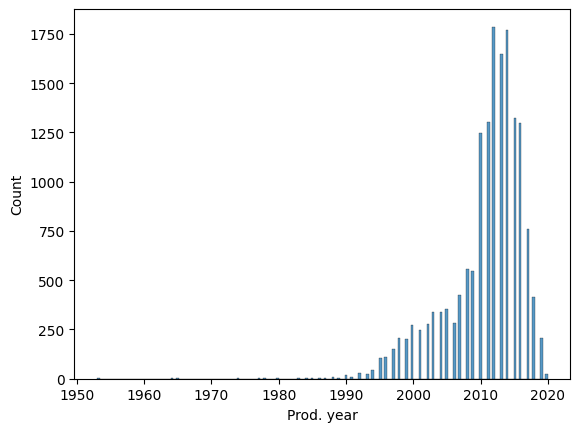

In [ ]:
#plotting a histogram for column Prod. year
sns.histplot(cars["Prod. year"])
plt.show()

In [ ]:
#dropping all cars with a prod year under 1985, due to the potential anomalous prices for cars considered 'antique' or 'really old'
cars.drop(cars[cars["Prod. year"] < 1985].index, inplace=True)

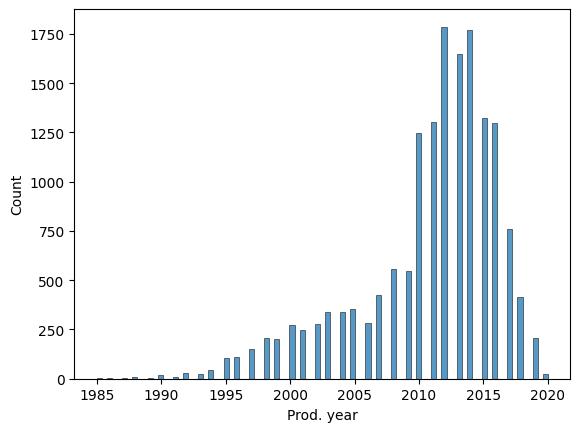

In [ ]:
#plotting a new histogram for column Prod year after dropping some values
sns.histplot(cars["Prod. year"])
plt.show()

## Step 3.3 Remove Duplicates

In [ ]:
#printing the number of duplicates in the dataset
print("Number of duplicate rows: {}".format(cars.duplicated().sum()))

#dropping all duplicates
cars.drop_duplicates(inplace=True)

Number of duplicate rows: 252


\\

>


# Step 4 Clean Data
Update columns as needed.

## Step 4.1 Update Levy
Replace '-' with 0's and convert to int

In [ ]:
#printing the defining info of the numerical column levy
cars["Levy"].describe()

count     16106
unique      528
top           -
freq       5184
Name: Levy, dtype: object

In [ ]:
# Replace '-' in Levy with $0, as '-' are the missing values in Levy
cars['Levy'] = cars['Levy'].replace('-', 0)
cars['Levy'].isin(['-']).sum()

# Cast Levy with to an int
cars['Levy'] = cars['Levy'].astype(int)

## Step 4.2 Mileage Column
Currently a string, with km at the end.
Remove 'km' and map to integer.


> Remove cars with very high mileage as outliers.



In [ ]:
#printing all values of Mileage column in the dataset
cars["Mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19231    107800 km
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
Name: Mileage, Length: 16106, dtype: object

In [ ]:
#dropping the 'km' suffix from all mileage values
cars["Mileage"] = cars["Mileage"].str.split(' ').str[0]

#converting mileage values to int
cars['Mileage'] = cars['Mileage'].astype(int)

#droppinh all instances of cars with mileage value more than 600,000
cars.drop(cars[cars.Mileage > 600000].index, inplace=True)

In [ ]:
#printing major info about all columns in th
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15964 entries, 0 to 19235
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                15964 non-null  int64  
 1   Price             15964 non-null  int64  
 2   Levy              15964 non-null  int64  
 3   Manufacturer      15964 non-null  object 
 4   Model             15964 non-null  object 
 5   Prod. year        15964 non-null  int64  
 6   Category          15964 non-null  object 
 7   Leather interior  15964 non-null  object 
 8   Fuel type         15964 non-null  object 
 9   Engine volume     15964 non-null  object 
 10  Mileage           15964 non-null  int64  
 11  Cylinders         15964 non-null  float64
 12  Gear box type     15964 non-null  object 
 13  Drive wheels      15964 non-null  object 
 14  Doors             15964 non-null  object 
 15  Wheel             15964 non-null  object 
 16  Color             15964 non-null  object

## Step 4.3 Category Column

Notice this dataset uses the term 'Jeep' for SUV, and 'Cabriolet' for Convertable.

Replace these names for understandability purposes.





In [ ]:
#printing the number of times different classes appear in the column 'Category'
cars['Category'].value_counts()

Sedan          7253
Jeep           4345
Hatchback      2362
Minivan         602
Coupe           478
Universal       354
Microbus        276
Goods wagon     217
Pickup           42
Cabriolet        31
Limousine         4
Name: Category, dtype: int64

In [ ]:
#Replacing the name of all instances called 'Jeep' with 'SUV', and 'Cabriolet' with 'Convertable'
cars['Category'] = cars['Category'].replace('Jeep', 'SUV').replace('Cabriolet','Convertable')

#printing the number of times different classes appear in the column 'Category'
cars['Category'].value_counts()

Sedan          7253
SUV            4345
Hatchback      2362
Minivan         602
Coupe           478
Universal       354
Microbus        276
Goods wagon     217
Pickup           42
Convertable      31
Limousine         4
Name: Category, dtype: int64

## Step 4.4 Fix Doors Column
Notice doors columns appears as it was formatted as a date. Modify to be just 2-3, 4-5, >5 doors.

In [ ]:
#printing the number of times different classes appear in the column 'Doors'
cars['Doors'].value_counts()

04-May    15156
02-Mar      704
>5          104
Name: Doors, dtype: int64

In [ ]:
#Replacing the name of all instances called '04-May' with '4-5', and '02-Mar' with '2-3'
cars['Doors'] = cars['Doors'].replace('04-May', '4-5').replace('02-Mar', '2-3')

#printing the number of times different classes appear in the column 'Doors'
cars['Doors'].value_counts()

4-5    15156
2-3      704
>5       104
Name: Doors, dtype: int64

## Step 4.5 Gearbox (Transmission)

Replace 'Variator' with CVT as this is a North American Term.

Also note, Tiptronic is an automatic transmission with the option to switch to manual shifting.





In [ ]:
#printing the number of times different classes appear in the column 'Gear box type'
cars['Gear box type'].value_counts()

Automatic    10712
Tiptronic     2841
Manual        1719
Variator       692
Name: Gear box type, dtype: int64

In [ ]:
#Replacing the name of all instances called 'Variator' with 'CVT'
cars['Gear box type'] = cars['Gear box type'].replace('Variator', 'CVT')

#printing the number of times different classes appear in the column 'Gear box type'
cars['Gear box type'].value_counts()

Automatic    10712
Tiptronic     2841
Manual        1719
CVT            692
Name: Gear box type, dtype: int64

## Stept 4.5 Fix Wheel Column

Naming is inconsistent between the two options. Modify to make consistent.



In [ ]:
#printing the number of times different classes appear in the column 'Wheel'
cars['Wheel'].value_counts()

Left wheel          14670
Right-hand drive     1294
Name: Wheel, dtype: int64

In [ ]:
#Replacing the name of all instances called 'Left wheel' with 'Left-hand drive'
cars['Wheel'] = cars['Wheel'].replace('Left wheel', 'Left-hand drive')

#printing the number of times different classes appear in the column 'Wheel'
cars['Wheel'].value_counts()

Left-hand drive     14670
Right-hand drive     1294
Name: Wheel, dtype: int64

## Stept 4.6 Convert Engine Volume Column

1. Extract 'Turbo' from the Engine volume column and turn into new feature.

2. Convert Engine volume into decimal


In [ ]:
#printing the number of times different classes appear in the column 'Engine volume'
cars['Engine volume'].value_counts()

2            3445
2.5          1864
1.8          1432
1.6          1369
1.5          1128
             ... 
3.1             1
0.8 Turbo       1
6.7             1
3.7 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 102, dtype: int64

In [ ]:
#creating a new column Turbo and then for every instance in column Engine volume, if it contains the word 'Turbo', set value in column Turbo as 1, and 0 otherwise
#https://stackoverflow.com/questions/66622656/np-where-for-string-containing-specific-word
cars["Turbo"] = np.where(cars["Engine volume"].str.contains('Turbo'), 1, 0)

#for every value in column Engine volume, if it contains the word Turbo, replace the word 'Turbo' with ' '.
cars["Engine volume"] = cars["Engine volume"].str.replace("Turbo", "")

#convert the values of column Engine volume to type float
cars["Engine volume"] = cars["Engine volume"].astype(float)

#print the most defining info of the now numerical column Engine volume in our dataset
cars["Engine volume"].describe()

count    15964.000000
mean         2.248753
std          0.829436
min          0.000000
25%          1.700000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine volume, dtype: float64

Notice max engine volume is 20.0. Remove incorrect/outliers.


In [ ]:
#drop all instances from dataset where the value of Engine volume column is more than 8
cars.drop(cars[cars["Engine volume"] > 8].index, inplace=True)

## Step 4.7 Drop ID Column

In [ ]:
#drop the feature ID from the dataset
cars.drop(labels=['ID'], axis=1, inplace=True)

#print the first 5 instances of the dataset
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,SUV,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left-hand drive,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,SUV,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left-hand drive,Black,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,CVT,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,SUV,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left-hand drive,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left-hand drive,Silver,4,0


# Step 5 Exporatory Data Analysis

## Stept 5.1 Numerical - Plot histograms
Note: Histograms are only for numerical features

### Price
Normal price distribution round the ~13,000 mark.
Fewer used car sales at higher prices.

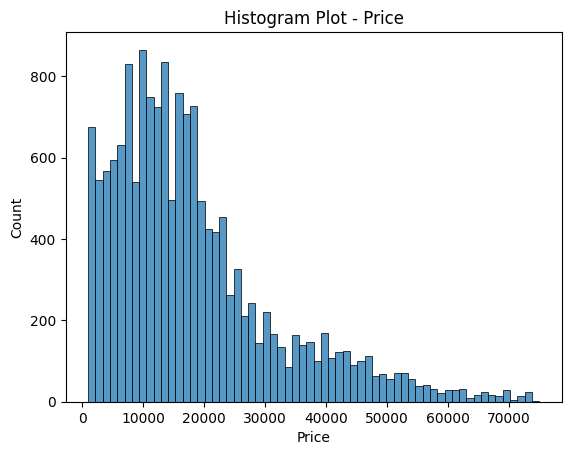

In [ ]:
#plotting a histogram of Price column
sns.histplot(cars.Price)
plt.title("Histogram Plot - Price")
plt.show()

In [ ]:
#printing the defining info about the numerical column 'Price' in our dataset
cars.Price.describe()

count    15962.000000
mean     18314.633442
std      13716.103718
min       1000.000000
25%       8467.000000
50%      15053.000000
75%      23521.000000
max      74953.000000
Name: Price, dtype: float64

### Cylinders
4 Cylinders are most common, followed by 6 and then 8. Some cars have 3 or 5.

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 0, 'Cylinders')

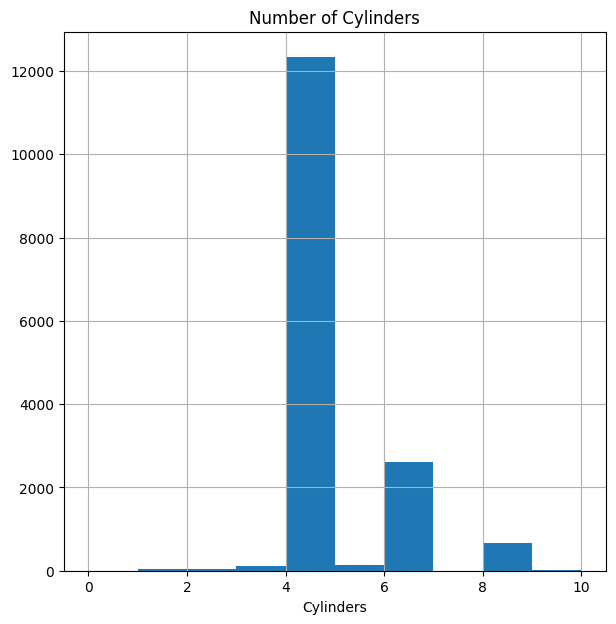

In [ ]:
#plotting a histogram for column Cylinders in the dataset
print(cars['Cylinders'].hist(figsize=(7,7), range=[0, 10], align='mid'))
plt.title("Number of Cylinders")
plt.xlabel("Cylinders")

### Prod. year
Normal distribution, with most used cars being from 2013-2014.

Text(0.5, 0, 'Year')

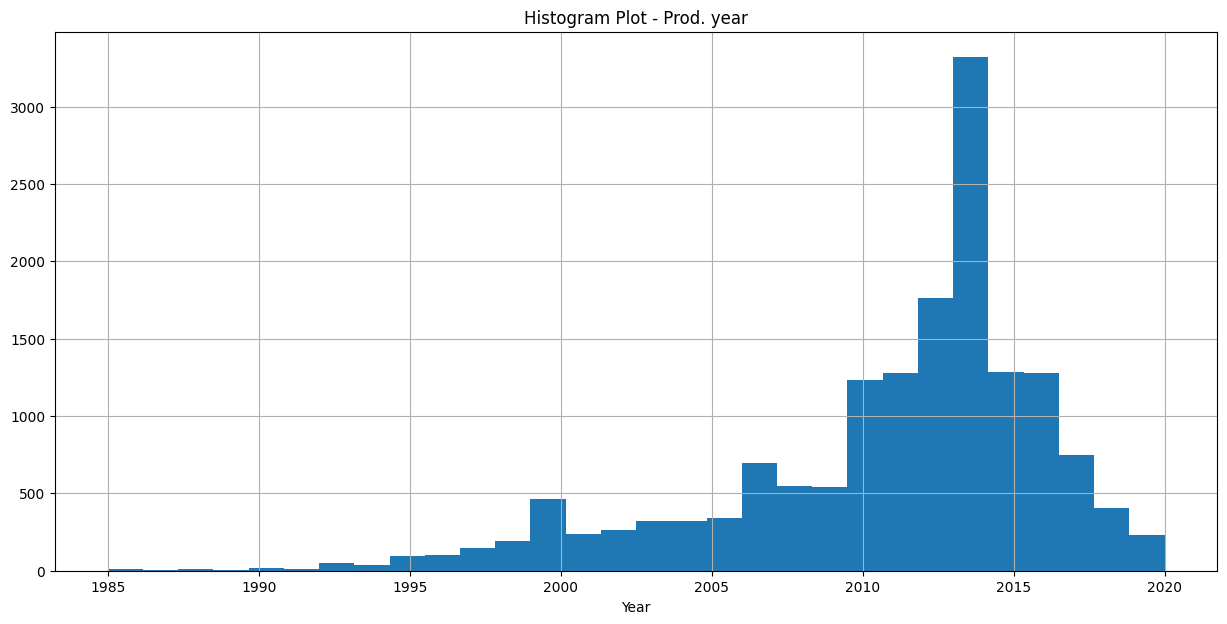

In [ ]:
#plotting a histogram for column Prod. year in the dataset
cars['Prod. year'].hist(figsize=(15,7), align='mid', bins=30)
plt.title("Histogram Plot - Prod. year")
plt.xlabel("Year")

### Airbags
Notice airbags appear to come in pairs.

Text(0, 0.5, 'Count')

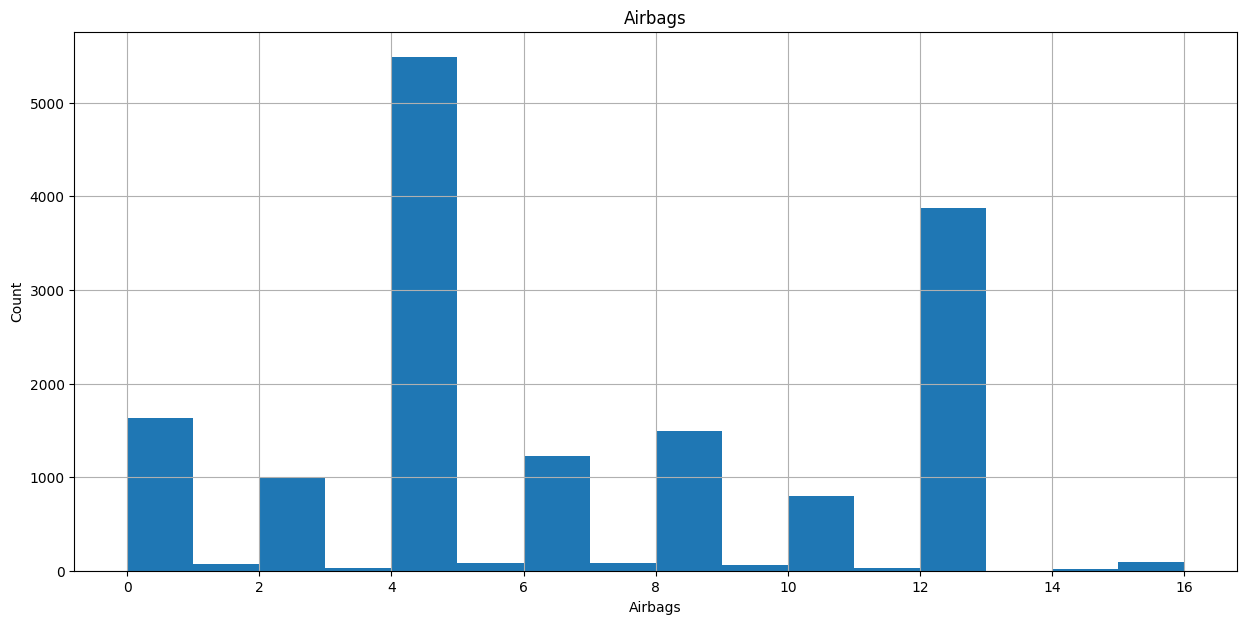

In [ ]:
#plotting a histogram for column Airbags in the dataset
cars['Airbags'].hist(figsize=(15,7), align='mid', bins=16)
plt.title("Airbags")
plt.xlabel("Airbags")
plt.ylabel("Count")

### Mileage
Normal distrubution, with most used cars around 100,000-150,000km.

Text(0.5, 0, 'Kilometers')

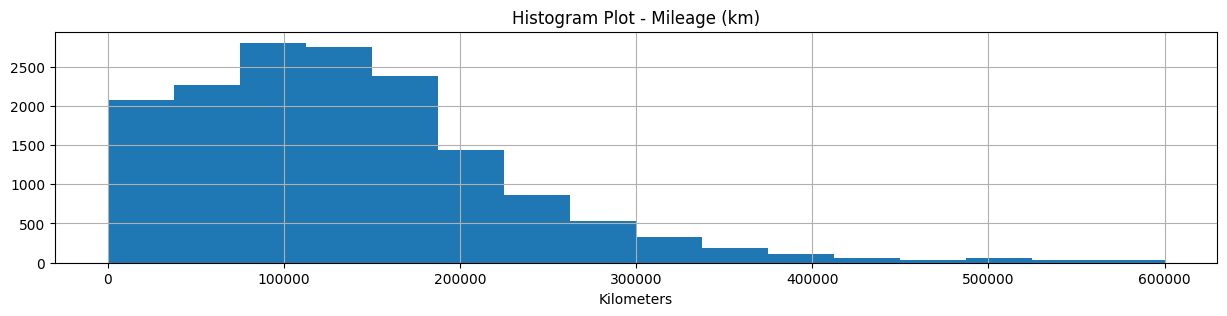

In [ ]:
#plotting a histogram for column Mileage in the dataset
cars['Mileage'].hist(figsize=(15,3), align='mid', bins=16)
plt.title("Histogram Plot - Mileage (km)")
plt.xlabel("Kilometers")


## Step 5.2 Categorical - Plot Barplots

### Category
Notice most common cars are Sedans, SUVs, Hatchbacks

Text(0.5, 0, 'Category')

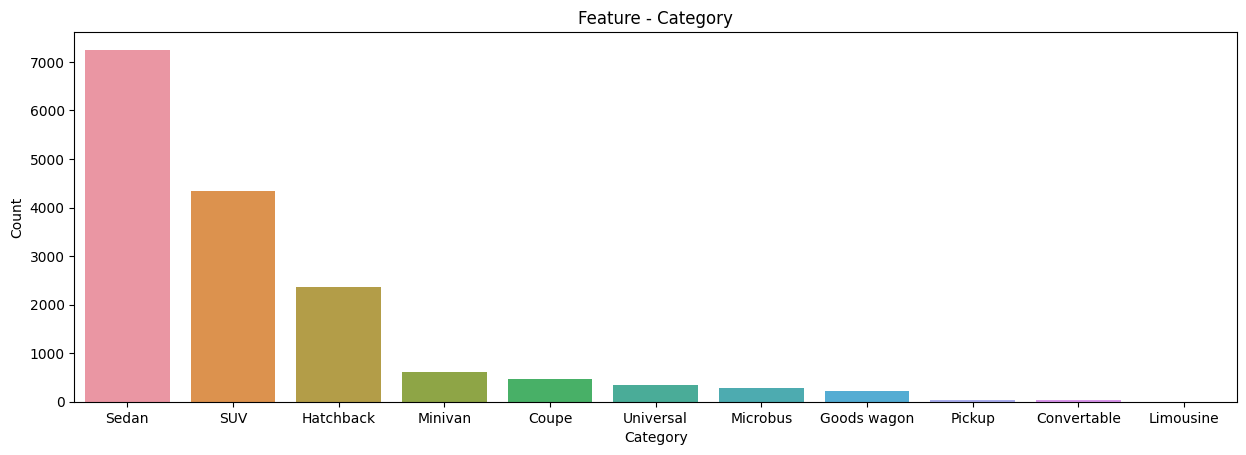

In [ ]:
#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/

#storing the number of times different classes appear in column 'Category', to variable count
count=cars['Category'].value_counts()

#plotting a barplot using the count variable, that stores the number of times evry class appears in the column 'Category'
plt.figure().set_figwidth(15)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Category')
plt.ylabel('Count')
plt.xlabel('Category')

### Drive Wheels
Notice most cars are front wheel drive, followed by 4x4 and then rear wheel drive.

Text(0.5, 0, 'Drive Wheels')

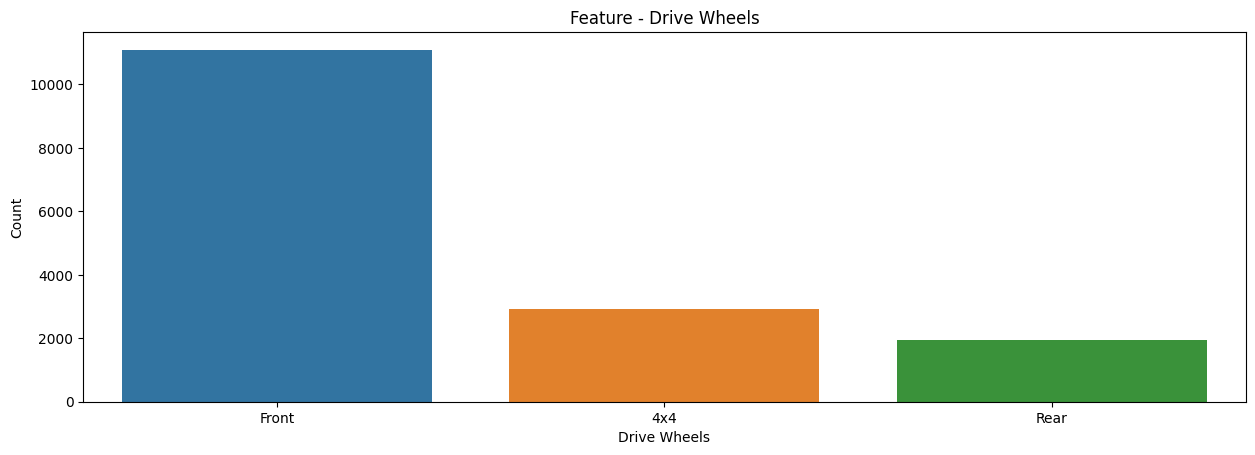

In [ ]:
#storing the number of times different classes appear in column 'Drive wheels', to variable count
count=cars['Drive wheels'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Drive Wheels'
plt.figure().set_figwidth(15)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Drive Wheels')
plt.ylabel('Count')
plt.xlabel('Drive Wheels')

### Engine Volume
Notice most common engine volumns are 2.0L, 2.5L, 1.8L, 1.5L. Other common ones include 3.0L, 3.5L.

Text(0.5, 0, 'Engine Volume')

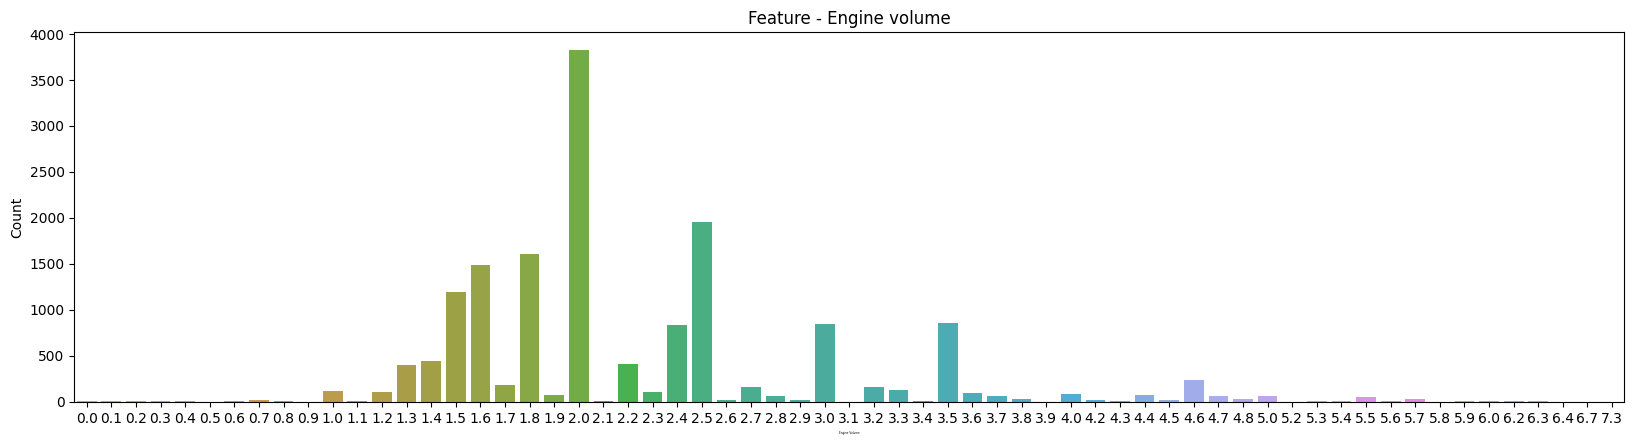

In [ ]:
#storing the number of times different classes appear in column 'Engine volume', to variable count
count=cars['Engine volume'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Engine volume'
plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Engine volume')
plt.ylabel('Count')
plt.xlabel('Engine Volume', fontsize=2)

### Turbo
Notice about 14,000 cars are listed as not having a turbo, compared to 2,000 cars having one.

Text(0.5, 0, 'Turbo')

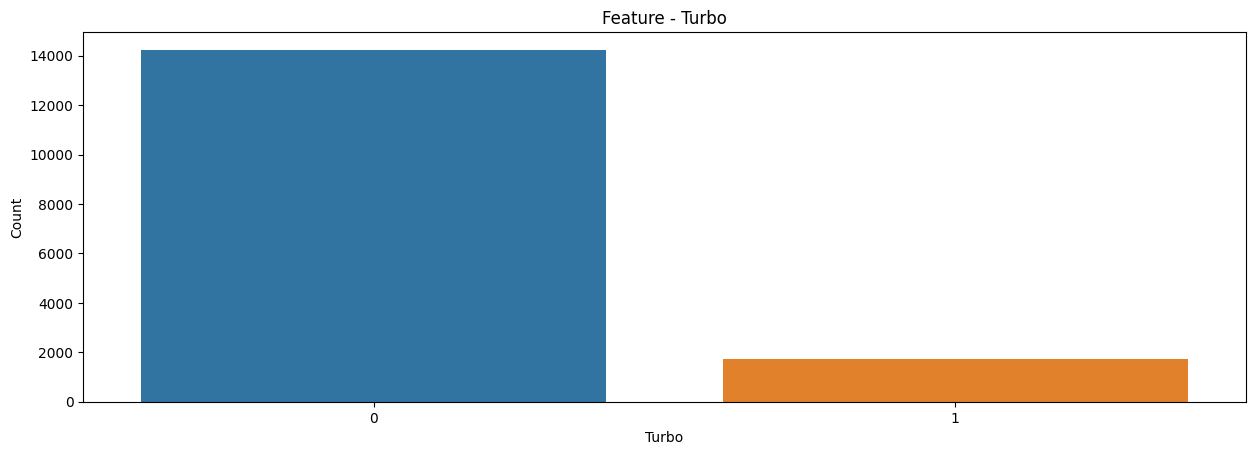

In [ ]:
#storing the number of times different classes appear in column 'Turbo', to variable count
count=cars['Turbo'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Turbo'
plt.figure().set_figwidth(15)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Turbo')
plt.ylabel('Count')
plt.xlabel('Turbo')

### Manufacturer
Most common within this dataset is Hyundai, Toyota, Mercedes, Chevrolet, Ford, BWM, Honda, etc.


Text(0.5, 0, 'Manufacturer')

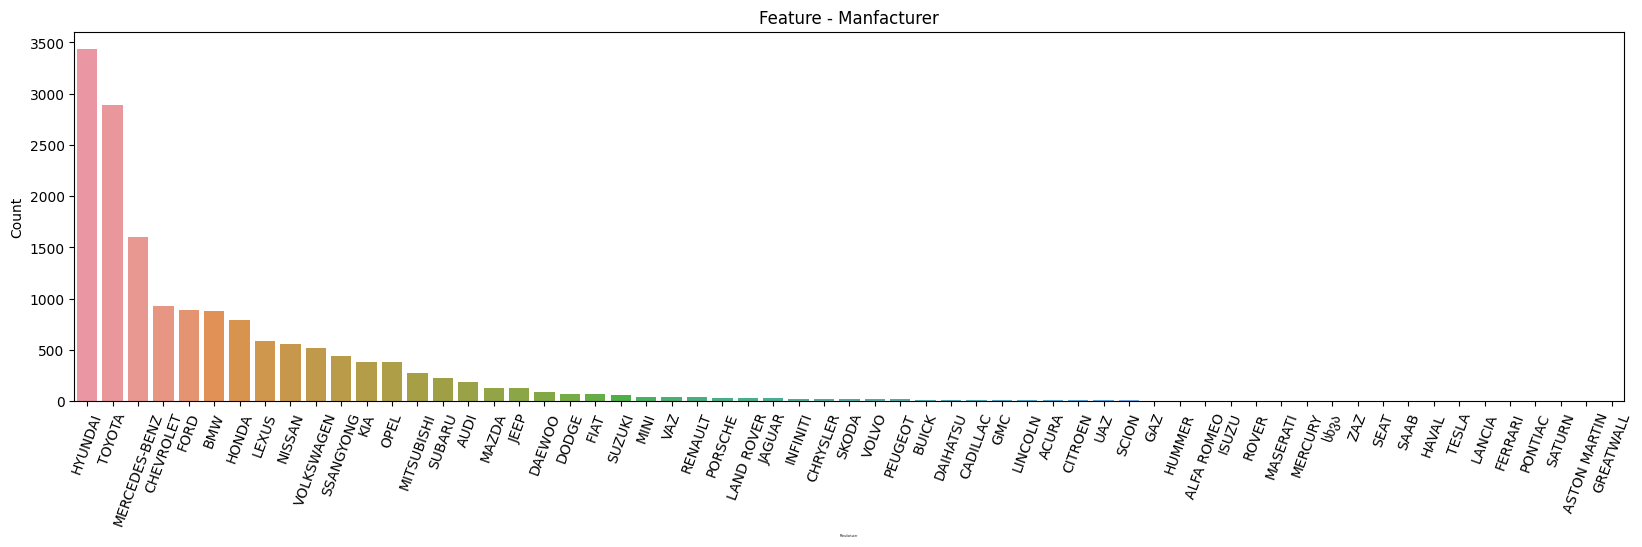

In [ ]:
#storing the number of times different classes appear in column 'Manufacturer', to variable count
count=cars['Manufacturer'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Manufacturer'
plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Manfacturer')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.xlabel('Manufacturer', fontsize=2)

Text(0.5, 0, 'Model')

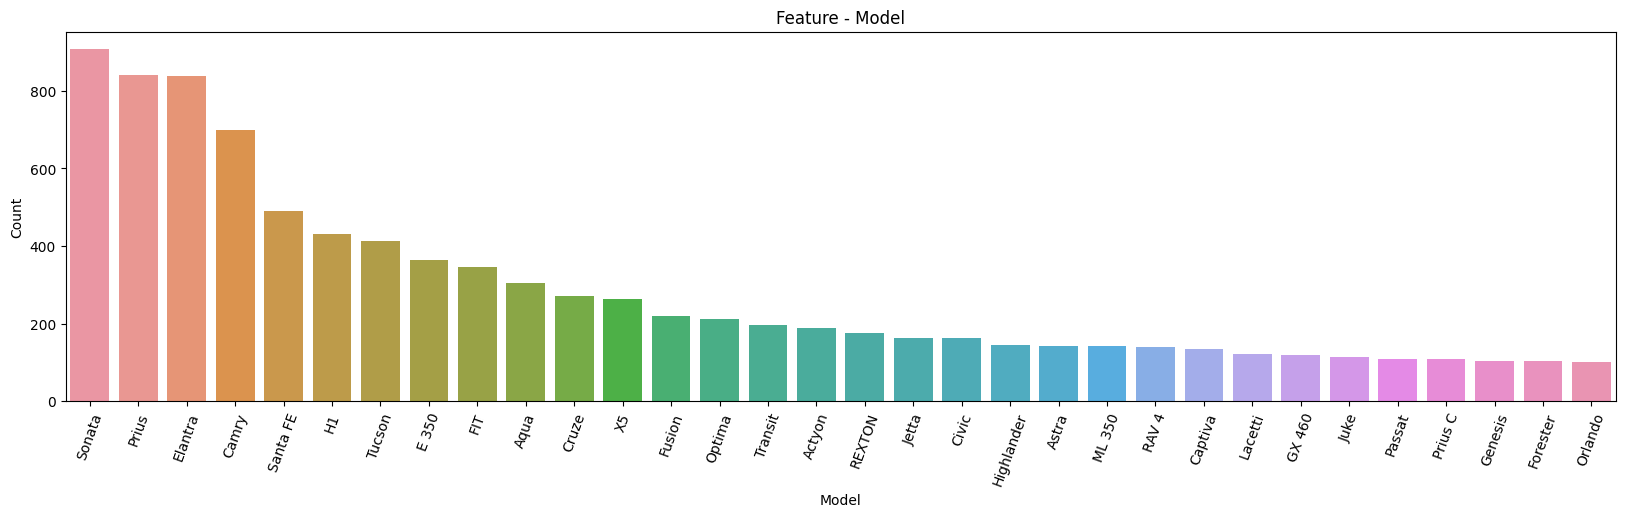

In [ ]:
#storing the number of times different classes appear in column 'Model', to variable count
count=cars['Model'].value_counts()

#dropping all classes where the count value is less than 20, in variable count
count.drop(count[count < 100].index, inplace=True)

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Model'
plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Model')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.xlabel('Model')

In [ ]:
# Source: https://plotly.com/python/treemaps/

#importing library
import plotly.express as px

#plotting a tree map using columns Manufacturer and Model from the dataset
fig = px.treemap(data_frame=cars, path=["Manufacturer","Model"])
fig.show()


### Gearbox
Most common transmission is Automatic, followed by Triptronic, Manual, CVT

Text(0.5, 0, 'Gearbox')

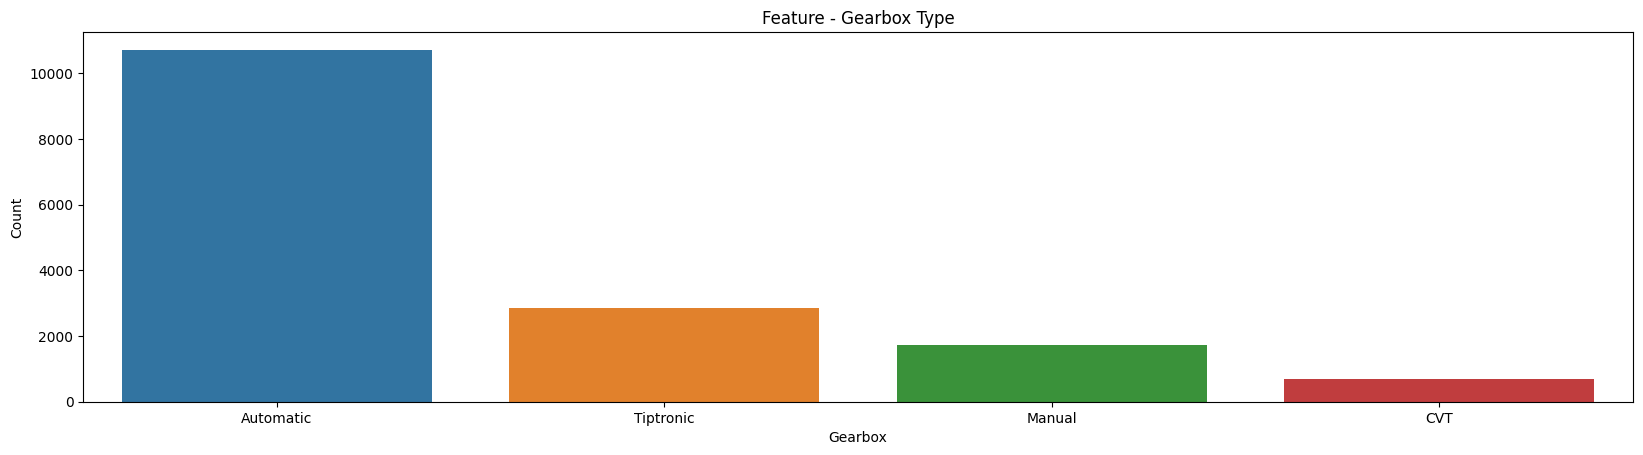

In [ ]:
#storing the number of times different classes appear in column 'Gear box type', to variable count
count=cars['Gear box type'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Gear box type'
plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Gearbox Type')
plt.ylabel('Count')
plt.xlabel('Gearbox')

## Doors

Text(0.5, 0, 'Doors')

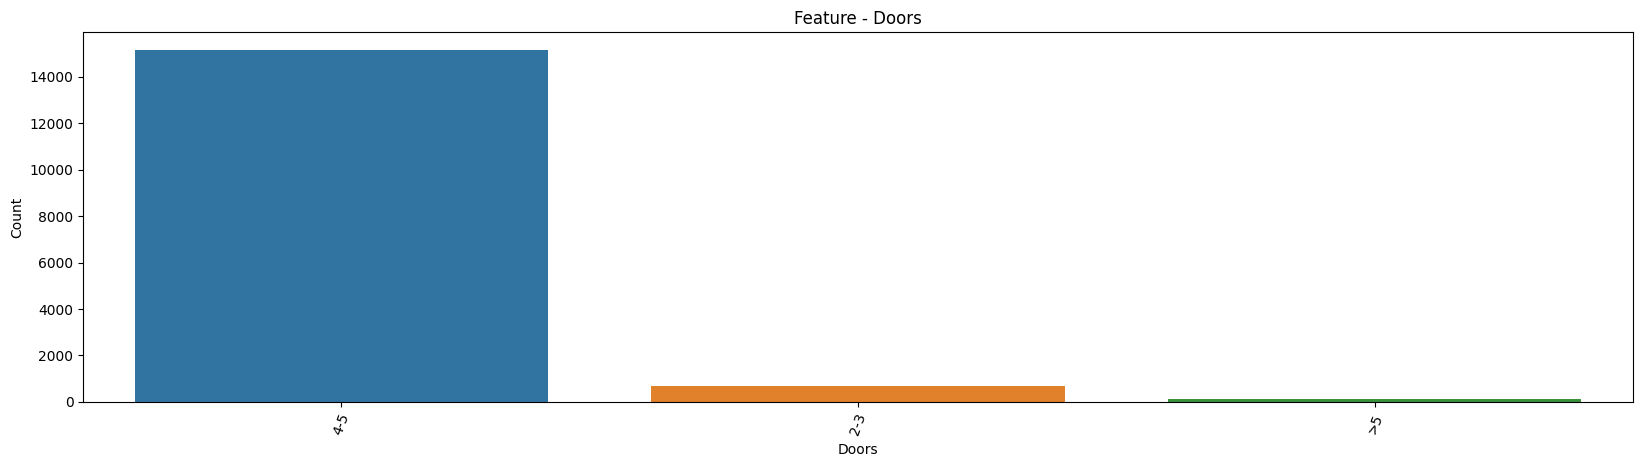

In [ ]:
#storing the number of times different classes appear in column 'Doors', to variable count
count=cars['Doors'].value_counts()

#plotting a barplot using the count variable, that stores the number of times every class appears in the column 'Doors'
plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Doors')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.xlabel('Doors')

### Color
Most common colors are black, white, silver, grey, blue.

Text(0.5, 0, 'Color')

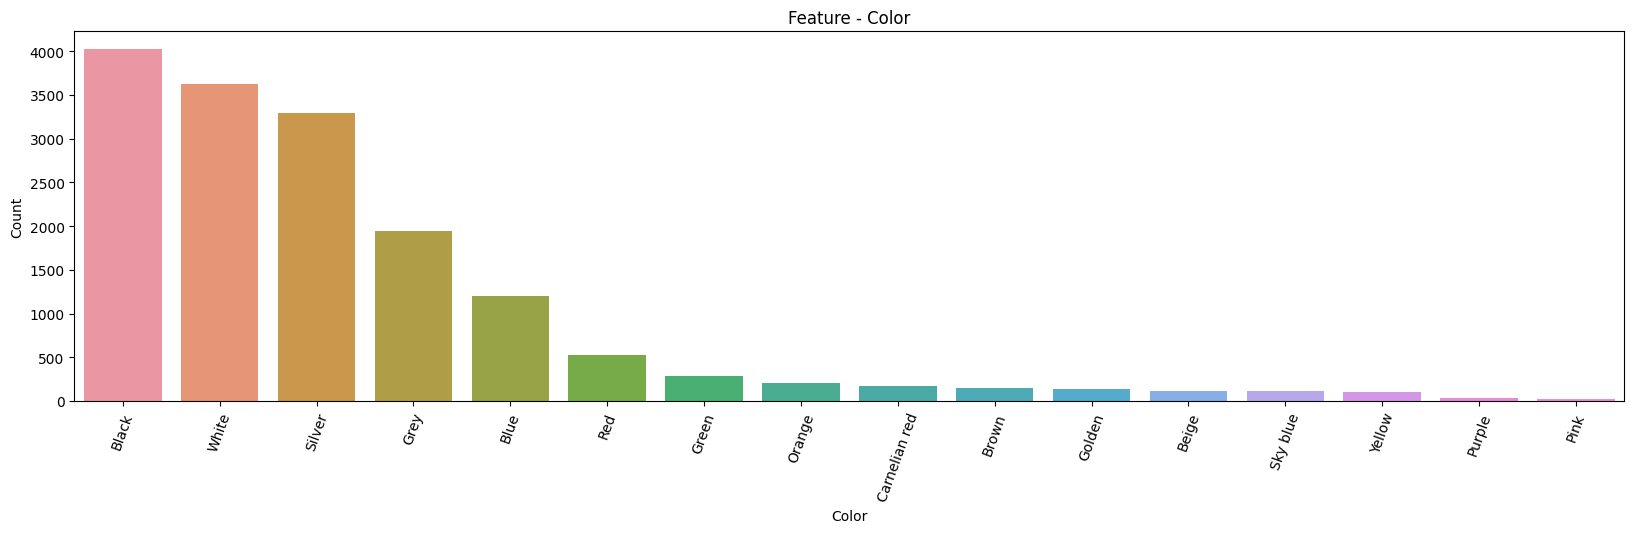

In [ ]:
#storing the number of times different classes appear in column 'Color', to variable count
count=cars['Color'].value_counts()

plt.figure().set_figwidth(20)
sns.barplot(x=count.index, y=count.values)
plt.title('Feature - Color')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.xlabel('Color')

## Step 5.3 - Correlation with target (Price)

In [ ]:
# Create the correlation matrix for numerical features and Price (target)
corr_matrix = cars.corr(numeric_only = True)
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Prod. year       0.402442
Engine volume    0.155830
Levy             0.119475
Turbo            0.112472
Cylinders        0.085346
Airbags         -0.020722
Mileage         -0.207418
Name: Price, dtype: float64

### Heatmap
Price - notice prod. year has a 0.4 correlation, and mileage has a -0.21 correlation.

Also notice engine volumne and cylinders have a 0.78 correlation.

Prod year and mileage have a -0.21 correlation, and Prod year and airbags has a 0.23 correlation.



Text(0.5, 1.0, 'Heatmap')

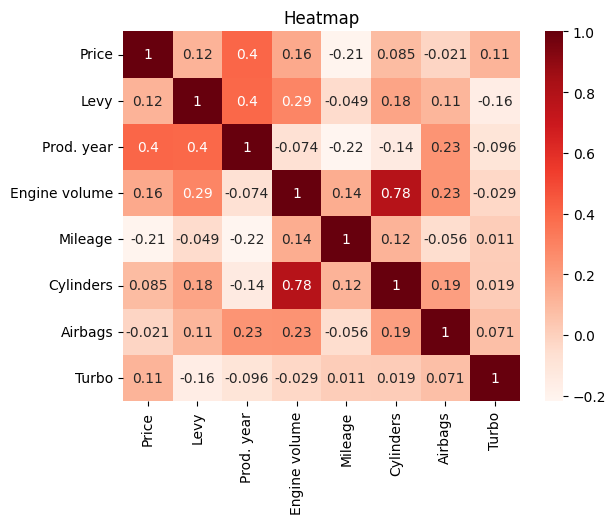

In [ ]:
# Use Seaborn to create a heatmap, to view correlation between features
sns.heatmap(cars.corr(numeric_only=True), annot=True, cmap='Reds')
plt.title("Heatmap")

Comparing Prod. year to price.

Older cars are cheaper. Newer cars have both cheap and expensive options.

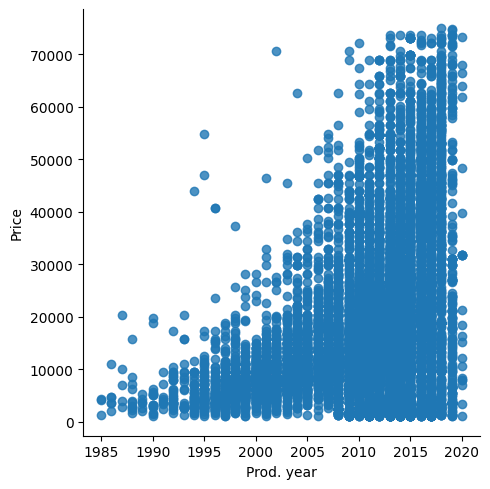

In [ ]:
# Create plot to view relationshio between prod year and price
sns.lmplot(x='Prod. year',y='Price', data=cars, fit_reg=False)
plt.show()

Comparing mileage to price.

Low mileage cars have a variety of price ranges. High mileage cars are cheaper.

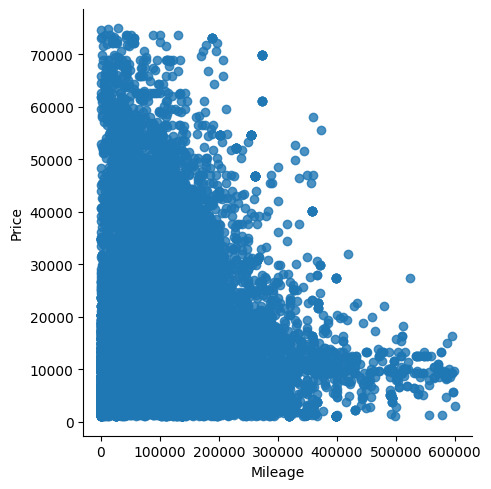

In [ ]:
# Create plot to view relationship between Mileage and Price
sns.lmplot(x='Mileage',y='Price', data=cars, fit_reg=False)
plt.show()

### Boxplots
Create boxplots for categorical features, to view averages and outliers.

In [ ]:
#Create boc plots for Categorical Features: Manufacturer, Category, Leather interior
bp = px.box(data_frame=cars,x='Manufacturer',y='Price')
bp.show()

bp = px.box(data_frame=cars,x='Category',y='Price')
bp.show()

bp = px.box(data_frame=cars,x='Leather interior',y='Price')
bp.show()

# Step 6 Split Dataset into X and y

In [ ]:
# Prepare for training, Split into X (features) and y (target)
X = cars.drop(['Price'], axis=1)
y = cars['Price']
print(X.shape, y.shape)

(15962, 17) (15962,)


# Step 7 Create Preprocessing Pipeline

## Create & Apply preprocessing pipeline to:



1.   Use SimpleImputer to replace missing numerical values with the mean
2.   Use StandardScaler to scale numerical columns
3.   Use SimpleImputer to replace missing categorial with most frequent value.
4.   Encode categorical columns using OrdinaryEncoder

In [ ]:
#Imports for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Code based on snippet fom Class Sides - EECS3401 with Dr. Ruba Al Omari
# Modifications made to pipelines, encoder used.

# Split into numerical columns and categorical columns
numerical_columns = X.select_dtypes(include='number').columns.to_list()
categorical_columns = X.select_dtypes(exclude='number').columns.to_list()

# Numerical pipeline - Use SimpleInputer to replace missing w/ mean, then scale.
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Categorical pipeline - Use SimpleImputer to replace missing w/ most frequent,
# then OneHot encode to turn into numerical values.
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(), StandardScaler())

preprocess = ColumnTransformer([
                                ('Numerical', numerical_pipeline, numerical_columns),
                                ('Categorical', categorical_pipeline, categorical_columns)],
                               )
preprocess

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Engine volume',
                                  'Mileage', 'Cylinders', 'Airbags', 'Turbo']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Manufacturer', 'Model', 'Category',
                                  'Leather interior', 'Fuel type',
                                  'Gear box type', 'Drive wheels', 'Doors',
                                  'Wheel', 'Color'])])

## Step 7.2 Run training set through preprocess


In [ ]:
# Code snippet fom Class Sides - EECS3401 with Dr. Ruba Al Omari

X_prepared = preprocess.fit_transform(X) #Prepare X by feeding through preprocess

# Feeding through preprocess converts dataframe into numpy array + removes headers.
# The below code adds headers back and then casts back to a pandas DataFrame
feature_names=preprocess.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared.shape # View shape after preprocess.

(15962, 17)

# Step 8 Split Dataset into 80% training / 20% testing.



In [ ]:
# Code snippet fom Class Sides - EECS3401 with Dr. Ruba Al Omari

from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing, then view shape
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12769, 17) (12769,) (3193, 17) (3193,)


# Step 9 Train Models -----------------------------------------------------------------------------------------------------

In [ ]:
# List to store results in
results = []

## 9.1 Multiple Linear Regression

In [ ]:
# import statements for models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
# Fit model
lin_reg = LinearRegression().fit(X_train, y_train.values.ravel())
print("Training Score: ", lin_reg.score(X_train, y_train))
print("Testing score: ", lin_reg.score(X_test, y_test))

Training Score:  0.33530709582613205
Testing score:  0.3184937752998527


In [ ]:
# Test model
y_predict = lin_reg.predict(X_test)

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Compare Prediction to Test Targets
decimal_places = 3
mae = round(mean_absolute_error(y_test, y_predict), decimal_places)
mse = round(mean_squared_error(y_test, y_predict), decimal_places)
rmse = round(sqrt(mse), decimal_places)
r2 = round(r2_score(y_test, y_predict), decimal_places)

print("Model 1: LINEAR REGRESSION")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Rooted Mean Squared Error: ", rmse)
print("R-squared Value: ", r2)

# Add results to list for future comparison
results.append(["Linear", lin_reg.score(X_train,y_train), v, rmse, mse, mae])

Model 1: LINEAR REGRESSION
Mean Absolute Error:  8471.249
Mean Squared Error:  129057648.09
Rooted Mean Squared Error:  11360.354
R-squared Value:  0.318


<Axes: >

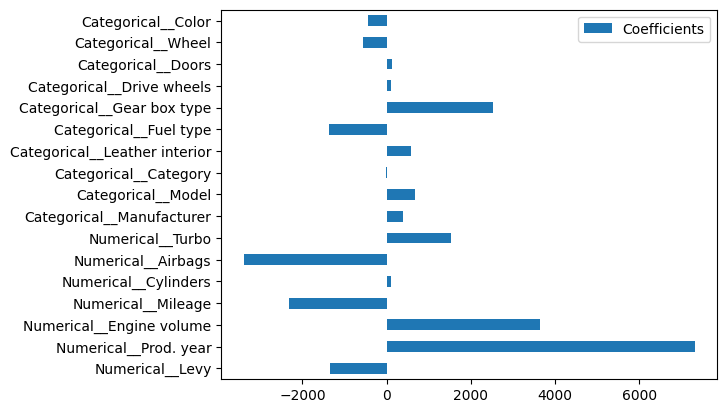

In [ ]:
# https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html
# Plot the feature weights as determined by linear regression

coefs = pd.DataFrame(
    lin_reg.coef_, columns=["Coefficients"], index=X_train.columns
)
coefs.plot(kind="barh")


## 9.2 Polynomial Regression

- Fitting for best model code snippet by [jonnybazookatone](https://stackoverflow.com/questions/47442102/how-to-find-the-best-degree-of-polynomials) on StackOverflow
- Iterates through a list of degrees `poly_params`, choosing the degree which yields the highest score

In [ ]:
# find best degree
poly_params = np.arange(1, 5)
rmse_list = []
min_rmse, min_deg = 1e10, 0

# Fit model for each degree
for degree in poly_params:
  # train features
  poly_train = PolynomialFeatures(degree=degree).fit_transform(X_train)
  # regression
  poly_reg = LinearRegression().fit(poly_train, y_train)
  # test
  poly_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
  y_predict = poly_reg.predict(poly_test)
  poly_mse = mean_squared_error(y_test, y_predict)
  poly_rmse = np.sqrt(poly_mse)
  rmse_list.append(poly_rmse)
  # comparison
  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = degree

print("Best degree: ", min_deg, ", minimum error: ", min_rmse)

Best degree:  3 , minimum error:  9146.686888649307


In [ ]:
print("Training score: ", poly_reg.score(poly_train, y_train))
print("Testint score: ", poly_reg.score(poly_test, y_test))

Training score:  0.7131798649474446
Testint score:  0.5582122133644238


In [ ]:
# Compare Prediction to Test Targets
decimal_places = 3
mae = round(mean_absolute_error(y_test, y_predict), decimal_places)
mse = round(mean_squared_error(y_test, y_predict), decimal_places)
rmse = round(sqrt(mse), decimal_places)
r2 = round(r2_score(y_test, y_predict), decimal_places)

print("Model 2: POLYNOMIAL REGRESSION")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Rooted Mean Squared Error: ", rmse)
print("R-squared Value: ", r2)

# Add results to list for future comparison
results.append(["Polynomial", poly_reg.score(poly_train,y_train), r2, rmse, mse, mae])

Model 2: POLYNOMIAL REGRESSION
Mean Absolute Error:  5895.749
Mean Squared Error:  83661881.039
Rooted Mean Squared Error:  9146.687
R-squared Value:  0.558


## 9.3 Random Forest Regressor

In [ ]:
# find best hyperparameters
#forest_params = {'n_estimators': [70,100,150,200,250,300], 'max_depth':[None], 'min_samples_split': [3,4]}

#forest_reg = RandomForestRegressor()
#forest_clf = GridSearchCV(forest_reg, forest_params, verbose=3, cv=2)
#forest_clf.fit(X_train, y_train.values.ravel())

#Print the best parameters
#print(forest_clf.best_params_)

# NOTE: When ran, found best params to be
# max_depth=None
# min_samples_split=3
# n_estimators=200

## GridSearch used
NOTE: When ran, found best params to be:
*   max_depth=None
*   min_samples_split=3
*   n_estimators=200

In [ ]:
# TRAIN MODEL USING BEST HYPERPARAMETERS
forest = RandomForestRegressor(n_estimators=200,
                       max_depth=None,
                       min_samples_split=3)

forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(min_samples_split=3, n_estimators=200)

In [ ]:
# Compare training and test score
print("Training score: ", forest.score(X_train, y_train))
print("Testing score: ", forest.score(X_test, y_test))

Training score:  0.9577695725477869
Testing score:  0.7837356653345139


In [ ]:
# Test the model
y_predict = forest.predict(X_test)

# Compare Prediction to Test Targets
decimal_places = 3
mae = round(mean_absolute_error(y_test, y_predict), decimal_places)
mse = round(mean_squared_error(y_test, y_predict), decimal_places)
rmse = round(sqrt(mse), decimal_places)
r2 = round(r2_score(y_test, y_predict), decimal_places)

print("Model 3: RANDOM FOREST")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Rooted Mean Squared Error: ", rmse)
print("R-squared Value: ", r2)

# Add results to list for future comparison
results.append(["Random Forest", forest.score(X_train,y_train), r2, rmse, mse, mae])

Model 3: RANDOM FOREST
Mean Absolute Error:  3704.26
Mean Squared Error:  40954235.466
Rooted Mean Squared Error:  6399.55
R-squared Value:  0.784


Text(0.5, 1.0, 'Feature Importance - Random Forest')

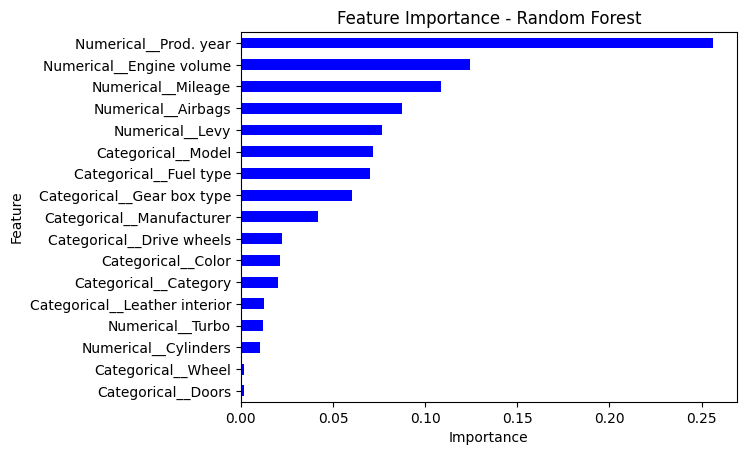

In [ ]:
# https://mljar.com/blog/feature-importance-in-random-forest/

# Calculate weights based on what Random Forest determined feature importance to be
weights = pd.Series(forest.feature_importances_, index=X_train.columns)
weights.sort_values(ascending=True, inplace=True)

# Plot in Barplot horizontal
weights.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

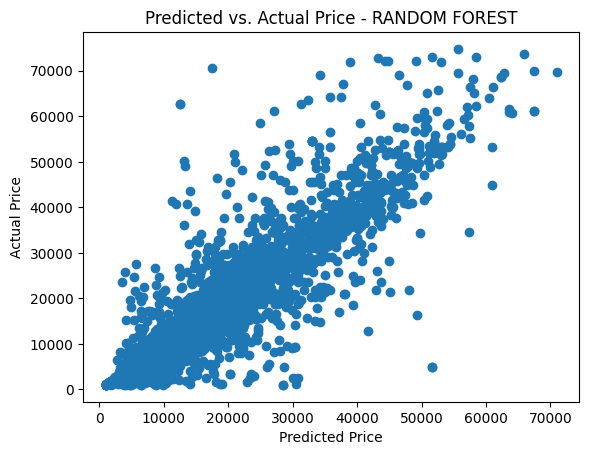

In [ ]:
# Create scatter plot for Random Forest, showing accuracy in terms of predicted vs actual target
plt.scatter(y_predict, y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs. Actual Price - RANDOM FOREST")
plt.show()

## 9.4 Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502

# GridSearched returned the below parameters as best
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, n_estimators=500)

In [ ]:
# Compare training and test score
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))


0.8700201550754297
0.7694676411849404


In [ ]:
# Test the model
y_pred = gbr.predict(X_test)

# Compare Prediction to Test Targets
decimal_places = 3
mae = round(mean_absolute_error(y_test, y_pred ), decimal_places)
mse = round(mean_squared_error(y_test, y_pred), decimal_places)
rmse = round(sqrt(mse), decimal_places)
r2 = round(r2_score(y_test, y_pred), decimal_places)

print("Model 4: Gradient Boost")
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Rooted Mean Squared Error: ", rmse)
print("R-squared Value: ", r2)

results.append(["Gradient Boost", gbr.score(X_train,y_train), r2, rmse, mse, mae])

Model 4: Gradient Boost
Mean Absolute Error:  4382.518
Mean Squared Error:  43656188.248
Rooted Mean Squared Error:  6607.283
R-squared Value:  0.769


Text(0.5, 1.0, 'Feature Importance - Gradient Boost')

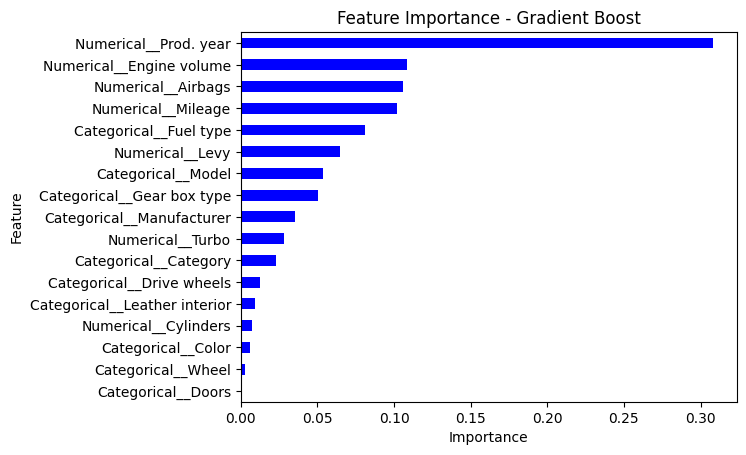

In [ ]:
# https://mljar.com/blog/feature-importance-in-random-forest/

# Plot important features as concluded by Gradient Boost model
weights = pd.Series(gbr.feature_importances_, index=X_train.columns)
weights.sort_values(ascending=True, inplace=True)
weights.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Gradient Boost")

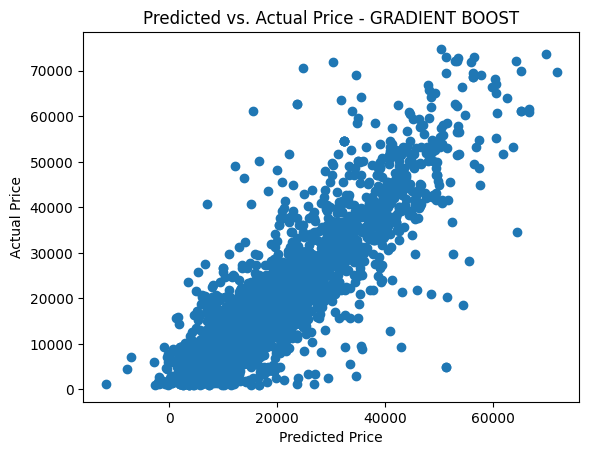

In [ ]:
# Create scatter plot for Gradient Boost, showing accuracy in terms of predicted vs actual target

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs. Actual Price - GRADIENT BOOST")
plt.show()

# Step 10 Compare Models

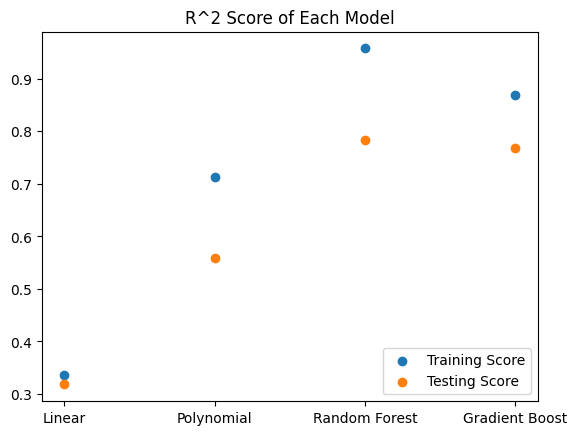

In [ ]:
# Create error plot for all 4 models.

# Convert results list into DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Training Score', 'Testing Score', 'RMSE', 'MSE', 'MAE'])

# Scatter plot of each models Training Score + Testing Score
plt.scatter(results_df['Model'], results_df['Training Score'])
plt.scatter(results_df['Model'], results_df['Testing Score'])

# Plot labels + legend
plt.title("R^2 Score of Each Model")
plt.legend(["Training Score", "Testing Score"], loc ="lower right")
plt.show()

In [ ]:
# View final results in table form.
results_df

,Model,Training Score,Testing Score,RMSE,MSE,MAE
0,Linear,0.335307,0.318,11360.354,1.290576e+08,8471.249
1,Polynomial,0.713180,0.558,9146.687,8.366188e+07,5895.749
2,Random Forest,0.957770,0.784,6399.550,4.095424e+07,3704.260
3,Gradient Boost,0.870020,0.769,6607.283,4.365619e+07,4382.518
